In [0]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

# importing statistics module 
import statistics
# %matplotlib inline

from sklearn import preprocessing

## Data Description
1. Trainning Set
    - 12K samples of house posted at May, June, July of 2018 at StreetEasy
2. Test Set 1
    - Samples of house posted at August 2018 with observed rent
    - 2000 Samples
3. Test Set 2 and Test Set 3
    - Samples of house posted at August 2018 without observed rent
    - 2000 Samples

In [0]:
train_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_train.csv', index_col=0)
test_set1_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test1.csv', index_col=0)
test_set2_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test2.csv', index_col=0)
# test_set3_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test3.csv', index_col=0)


In [46]:
train_df.shape

(12000, 38)

In [47]:
test_set1_df.shape

(2000, 38)

In [48]:
test_set2_df.shape

(2000, 38)

In [0]:
combine_df = pd.concat([train_df,test_set1_df,test_set2_df])

In [50]:
combine_df.shape

(16000, 38)

In [51]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 7236931 to 7443274
Data columns (total 38 columns):
addr_unit                 15861 non-null object
building_id               16000 non-null int64
bedrooms                  16000 non-null int64
bathrooms                 16000 non-null float64
size_sqft                 16000 non-null float64
created_at                16000 non-null object
addr_street               16000 non-null object
addr_city                 16000 non-null object
addr_zip                  16000 non-null int64
addr_lat                  16000 non-null float64
addr_lon                  16000 non-null float64
bin                       15999 non-null float64
bbl                       16000 non-null int64
floor_count               16000 non-null float64
year_built                15448 non-null float64
min_to_subway             15841 non-null float64
has_doorman               16000 non-null int64
has_elevator              16000 non-null int64
has_fireplace    

In [0]:
#drop all the object column
numeric_df = combine_df.select_dtypes(include=[np.number])

In [0]:
#drop bin and bbl
new_numeric_df = numeric_df.drop(['bin', 'bbl'], axis=1)

In [54]:
new_numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 7236931 to 7443274
Data columns (total 27 columns):
building_id               16000 non-null int64
bedrooms                  16000 non-null int64
bathrooms                 16000 non-null float64
size_sqft                 16000 non-null float64
addr_zip                  16000 non-null int64
addr_lat                  16000 non-null float64
addr_lon                  16000 non-null float64
floor_count               16000 non-null float64
year_built                15448 non-null float64
min_to_subway             15841 non-null float64
has_doorman               16000 non-null int64
has_elevator              16000 non-null int64
has_fireplace             16000 non-null int64
has_dishwasher            16000 non-null int64
is_furnished              16000 non-null int64
has_gym                   16000 non-null int64
allows_pets               16000 non-null int64
has_washer_dryer          16000 non-null int64
has_garage             

In [0]:
columns = list(new_numeric_df.columns)


In [0]:
columns.remove('rent')
columns.append('const')

In [57]:
columns

['building_id',
 'bedrooms',
 'bathrooms',
 'size_sqft',
 'addr_zip',
 'addr_lat',
 'addr_lon',
 'floor_count',
 'year_built',
 'min_to_subway',
 'has_doorman',
 'has_elevator',
 'has_fireplace',
 'has_dishwasher',
 'is_furnished',
 'has_gym',
 'allows_pets',
 'has_washer_dryer',
 'has_garage',
 'has_roofdeck',
 'has_concierge',
 'has_pool',
 'has_garden',
 'has_childrens_playroom',
 'no_fee',
 'floornumber',
 'const']

In [58]:
# Add a constant to our existing dataframe for modeling purposes
fixed_set = numeric_df.dropna(axis=0)
fixed_set = sm.add_constant(fixed_set)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [59]:
fixed_set['rent'].shape

(11917,)

In [60]:
fixed_set[columns].shape

(11917, 27)

In [61]:
est = sm.OLS(fixed_set['rent'], 
             fixed_set[columns].astype(float)).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     810.3
Date:                Sat, 16 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:56:21   Log-Likelihood:            -1.0548e+05
No. Observations:               11917   AIC:                         2.110e+05
Df Residuals:                   11890   BIC:                         2.112e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
building_id            -1.23

In [0]:
#drop those column have p-value large than 0.005
fixed_pvalue_df = new_numeric_df.drop(['building_id', 'addr_lat','year_built','min_to_subway','has_doorman','has_roofdeck','has_concierge','has_garden','has_childrens_playroom'], axis=1)

In [63]:
fixed_pvalue_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 7236931 to 7443274
Data columns (total 18 columns):
bedrooms            16000 non-null int64
bathrooms           16000 non-null float64
size_sqft           16000 non-null float64
addr_zip            16000 non-null int64
addr_lon            16000 non-null float64
floor_count         16000 non-null float64
has_elevator        16000 non-null int64
has_fireplace       16000 non-null int64
has_dishwasher      16000 non-null int64
is_furnished        16000 non-null int64
has_gym             16000 non-null int64
allows_pets         16000 non-null int64
has_washer_dryer    16000 non-null int64
has_garage          16000 non-null int64
has_pool            16000 non-null int64
rent                14000 non-null float64
no_fee              16000 non-null int64
floornumber         14235 non-null float64
dtypes: float64(6), int64(12)
memory usage: 2.3 MB


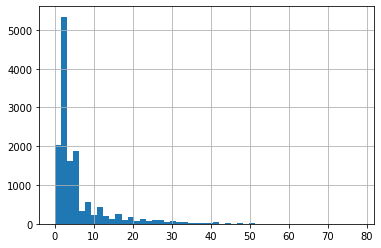

In [64]:
#fill missing value for floornumber
fixed_pvalue_df['floornumber'].hist(bins=50)

In [65]:
fixed_pvalue_df['floornumber'].describe()

count    14235.000000
mean         6.179979
std          7.714384
min          0.000000
25%          2.000000
50%          3.000000
75%          6.000000
max         78.000000
Name: floornumber, dtype: float64

In [0]:
median_value = (fixed_pvalue_df['floornumber']).median()

In [67]:
print(median_value)

3.0


In [0]:
#fill the median value to the floornumber
fixed_pvalue_df['floornumber']=fixed_pvalue_df['floornumber'].fillna(median_value)

In [69]:
#all columns have 16000 entries
fixed_pvalue_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 7236931 to 7443274
Data columns (total 18 columns):
bedrooms            16000 non-null int64
bathrooms           16000 non-null float64
size_sqft           16000 non-null float64
addr_zip            16000 non-null int64
addr_lon            16000 non-null float64
floor_count         16000 non-null float64
has_elevator        16000 non-null int64
has_fireplace       16000 non-null int64
has_dishwasher      16000 non-null int64
is_furnished        16000 non-null int64
has_gym             16000 non-null int64
allows_pets         16000 non-null int64
has_washer_dryer    16000 non-null int64
has_garage          16000 non-null int64
has_pool            16000 non-null int64
rent                14000 non-null float64
no_fee              16000 non-null int64
floornumber         16000 non-null float64
dtypes: float64(6), int64(12)
memory usage: 2.3 MB


In [70]:
fixed_pvalue_df.describe()

,bedrooms,bathrooms,size_sqft,addr_zip,addr_lon,floor_count,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_pool,rent,no_fee,floornumber
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,14000.000000,16000.000000,16000.000000
mean,1.664937,1.237375,846.587937,10682.200312,-73.956909,10.178044,0.461250,0.037187,0.541125,0.031813,0.290187,0.496937,0.268750,0.169687,0.072375,3591.997214,0.499437,5.829187
std,1.085470,0.545937,510.578192,592.263814,0.042880,11.998397,0.498512,0.189227,0.498321,0.175506,0.453863,0.500006,0.443323,0.375370,0.259116,2874.099247,0.500015,7.344314
min,0.000000,0.000000,0.000000,10001.000000,-74.168405,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1250.000000,0.000000,0.000000
25%,1.000000,1.000000,601.000000,10023.000000,-73.986000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2250.000000,0.000000,2.000000
50%,2.000000,1.000000,800.000000,11103.000000,-73.961582,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2900.000000,0.000000,3.000000
75%,2.000000,1.000000,1000.000000,11218.000000,-73.936302,12.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3900.000000,1.000000,6.000000
max,8.000000,20.000000,10000.000000,11694.000000,-73.730550,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50000.000000,1.000000,78.000000


In [0]:
fixed_pvalue_df['bedrooms']=fixed_pvalue_df['bedrooms'].astype(float)

In [72]:
fixed_pvalue_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 7236931 to 7443274
Data columns (total 18 columns):
bedrooms            16000 non-null float64
bathrooms           16000 non-null float64
size_sqft           16000 non-null float64
addr_zip            16000 non-null int64
addr_lon            16000 non-null float64
floor_count         16000 non-null float64
has_elevator        16000 non-null int64
has_fireplace       16000 non-null int64
has_dishwasher      16000 non-null int64
is_furnished        16000 non-null int64
has_gym             16000 non-null int64
allows_pets         16000 non-null int64
has_washer_dryer    16000 non-null int64
has_garage          16000 non-null int64
has_pool            16000 non-null int64
rent                14000 non-null float64
no_fee              16000 non-null int64
floornumber         16000 non-null float64
dtypes: float64(7), int64(11)
memory usage: 2.3 MB


In [0]:
#take out the rent to make sure we won't normalize it
columns = list(fixed_pvalue_df.columns)
columns.remove('rent')
rent_col=fixed_pvalue_df['rent']


In [74]:
columns

['bedrooms',
 'bathrooms',
 'size_sqft',
 'addr_zip',
 'addr_lon',
 'floor_count',
 'has_elevator',
 'has_fireplace',
 'has_dishwasher',
 'is_furnished',
 'has_gym',
 'allows_pets',
 'has_washer_dryer',
 'has_garage',
 'has_pool',
 'no_fee',
 'floornumber']

In [0]:
#normalize the data
normalized_df=(fixed_pvalue_df[columns]-fixed_pvalue_df[columns].min())/(fixed_pvalue_df[columns].max()-fixed_pvalue_df[columns].min())

In [76]:
normalized_df.describe()

,bedrooms,bathrooms,size_sqft,addr_zip,addr_lon,floor_count,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_pool,no_fee,floornumber
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,0.208117,0.061869,0.084659,0.402363,0.483028,0.113089,0.461250,0.037187,0.541125,0.031813,0.290187,0.496937,0.268750,0.169687,0.072375,0.499437,0.074733
std,0.135684,0.027297,0.051058,0.349831,0.097931,0.133316,0.498512,0.189227,0.498321,0.175506,0.453863,0.500006,0.443323,0.375370,0.259116,0.500015,0.094158
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125000,0.050000,0.060100,0.012995,0.416588,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641
50%,0.250000,0.050000,0.080000,0.650916,0.472355,0.055556,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462
75%,0.250000,0.050000,0.100000,0.718842,0.530091,0.133333,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.076923
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
rent_col.shape

(16000,)

In [78]:
normalized_df.shape

(16000, 17)

In [0]:
final_df=pd.concat([normalized_df,rent_col],axis=1)

In [80]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 7236931 to 7443274
Data columns (total 18 columns):
bedrooms            16000 non-null float64
bathrooms           16000 non-null float64
size_sqft           16000 non-null float64
addr_zip            16000 non-null float64
addr_lon            16000 non-null float64
floor_count         16000 non-null float64
has_elevator        16000 non-null float64
has_fireplace       16000 non-null float64
has_dishwasher      16000 non-null float64
is_furnished        16000 non-null float64
has_gym             16000 non-null float64
allows_pets         16000 non-null float64
has_washer_dryer    16000 non-null float64
has_garage          16000 non-null float64
has_pool            16000 non-null float64
no_fee              16000 non-null float64
floornumber         16000 non-null float64
rent                14000 non-null float64
dtypes: float64(18)
memory usage: 2.3 MB


In [81]:
final_df.describe()

,bedrooms,bathrooms,size_sqft,addr_zip,addr_lon,floor_count,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_pool,no_fee,floornumber,rent
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,14000.000000
mean,0.208117,0.061869,0.084659,0.402363,0.483028,0.113089,0.461250,0.037187,0.541125,0.031813,0.290187,0.496937,0.268750,0.169687,0.072375,0.499437,0.074733,3591.997214
std,0.135684,0.027297,0.051058,0.349831,0.097931,0.133316,0.498512,0.189227,0.498321,0.175506,0.453863,0.500006,0.443323,0.375370,0.259116,0.500015,0.094158,2874.099247
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1250.000000
25%,0.125000,0.050000,0.060100,0.012995,0.416588,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,2250.000000
50%,0.250000,0.050000,0.080000,0.650916,0.472355,0.055556,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,2900.000000
75%,0.250000,0.050000,0.100000,0.718842,0.530091,0.133333,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.076923,3900.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50000.000000
